# Iris Flower Classification Model Using Python 


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
iris_flower_file = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [44]:
iris_flower_file.head(16)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [45]:
iris_flower_file.shape

(150, 5)

In [46]:
iris_flower_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
iris_flower_file.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
iris_flower_file.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [49]:
iris_flower_file.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

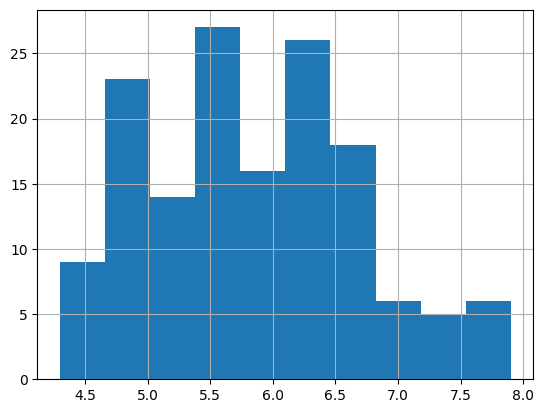

In [50]:
iris_flower_file['sepal_length'].hist()

<Axes: >

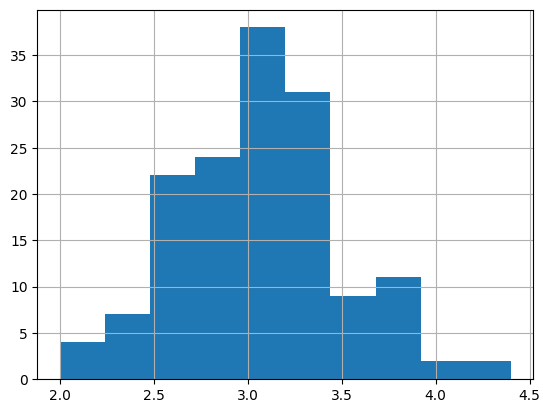

In [51]:
iris_flower_file['sepal_width'].hist()

<Axes: >

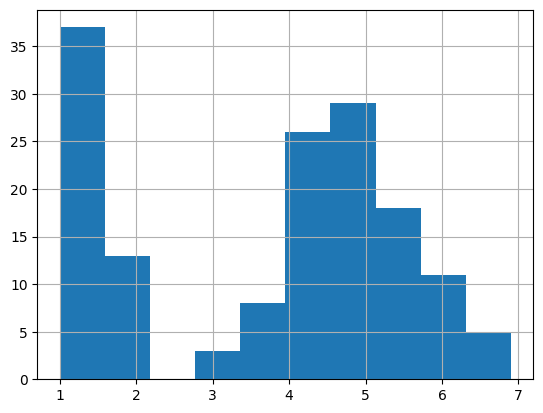

In [52]:
iris_flower_file['petal_length'].hist()

<Axes: >

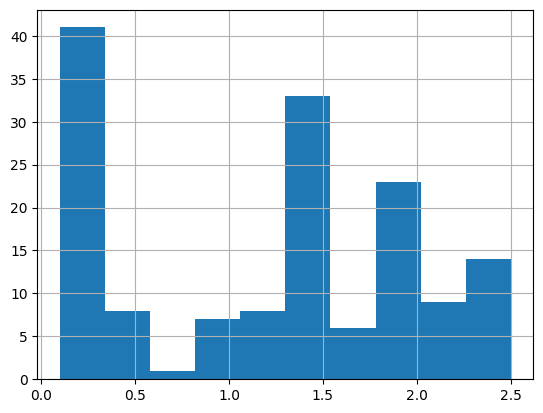

In [53]:
iris_flower_file['petal_width'].hist()

In [54]:
colors = ['red', 'Black', 'teal']

In [55]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

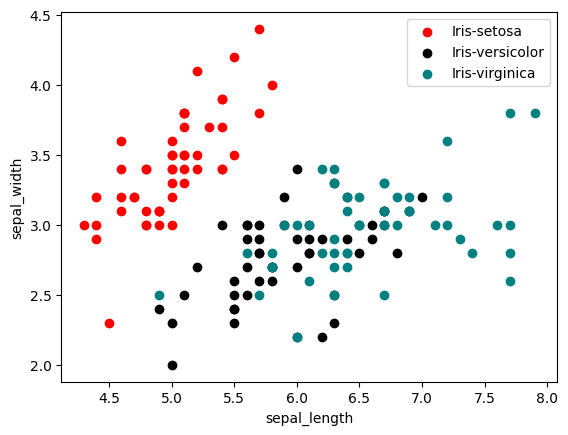

In [56]:
for i in range(3):
    x = iris_flower_file[iris_flower_file['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

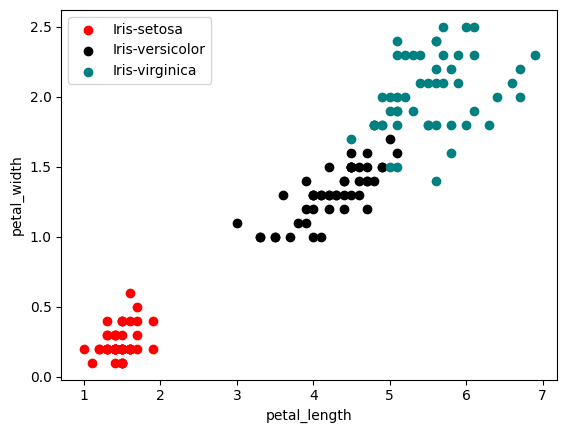

In [57]:
for i in range(3):
    x = iris_flower_file[iris_flower_file['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

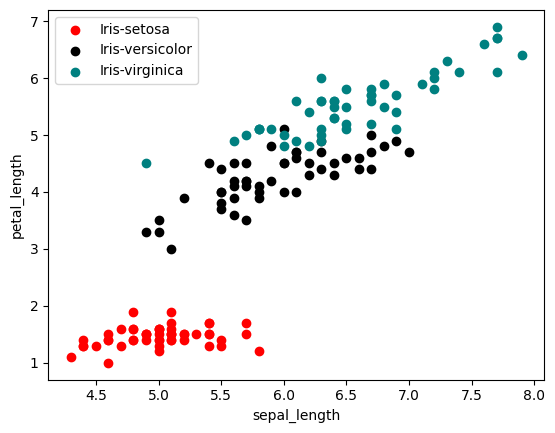

In [58]:
for i in range(3):
    x = iris_flower_file[iris_flower_file['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()

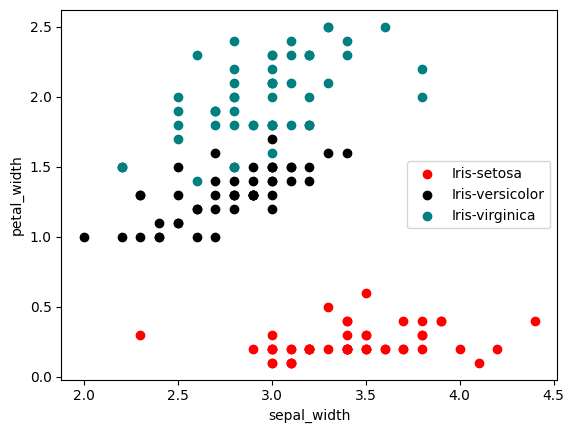

In [59]:
for i in range(3):
    x = iris_flower_file[iris_flower_file['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

<Axes: >

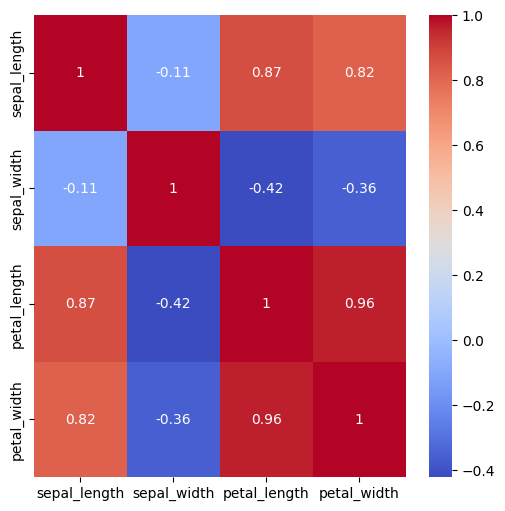

In [60]:
numeric_columns = iris_flower_file.drop(columns = 'species')
corr = numeric_columns.corr()
fig,axis = plt.subplots(figsize = (6, 6))
sns.heatmap(corr, annot = True, ax = axis, cmap = 'coolwarm')

In [61]:
le = LabelEncoder()

In [62]:
iris_flower_file['species'] = le.fit_transform(iris_flower_file['species'])

In [63]:
iris_flower_file.head(16)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [64]:
x = iris_flower_file.drop(columns = 'species')

In [65]:
y = iris_flower_file['species']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [67]:
LR = LogisticRegression()

In [68]:
LR.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
KNN = KNeighborsClassifier()

In [70]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [71]:
DT = DecisionTreeClassifier()

In [72]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
LR_accuracy = LR.score(x_test, y_test)*100
KNN_accuracy = KNN.score(x_test, y_test)*100
DT_accuracy = DT.score(x_test, y_test)*100

In [74]:
print(f"Accuracy by using Logistic Regression: {LR_accuracy}%")

Accuracy by using Logistic Regression: 100.0%


In [75]:
print(f"Accuracy by using K Nearest Neighbors Algorithm: {KNN_accuracy}%")

Accuracy by using K Nearest Neighbors Algorithm: 97.77777777777777%


In [76]:
print(f"Accuracy by using Decision Making Tree: {DT_accuracy}%")

Accuracy by using Decision Making Tree: 93.33333333333333%
